# Monte Carlo Simulation

The modern version of the Monte Carlo method was invented in the late 1940s by Stanislaw Ulam, while he was working on nuclear weapons projects at the Los Alamos National Laboratory. 

Monte Carlo methods, or experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results; the underlying concept is to use randomness to solve problems that might be deterministic in principle. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution. 

Since in business and finance random variables are quite common, Monte Carlo simulations have a vast array of potential applications in these fields, e.g. they are used to estimate the likelihood that an asset price will move in a certain way, or analysts use them to assess the risk that an entity will default, and to analyze derivatives such as options.

Monte Carlo simulations have countless applications outside of business and finance, such as in meteorology, astronomy and particle physics.


### The Algorithm
Monte Carlo (MC) methods are used when a closed-form solution for a property being studied cannot be developed (i.e. 
the probability of varying outcomes cannot be determined because of random variable interference). 

When faced with significant uncertainty in the process of making a forecast or estimation, rather than just replacing the uncertain variable with a single average number, the Monte Carlo Simulation might prove to be a better solution by using multiple values.

This is achieved by building models of possible results where any factor that has inherent uncertainty (random varaiables) is replaces with a range of values (i.e. a probability distribution). 

A Monte Carlo simulation takes the variable that has uncertainty and assigns it a random value. The model is then run and a result is provided. This process is repeated again and again while assigning the variable in question with many different values. Once the simulation is complete, the results are averaged together to provide an estimate or the distribution of possible outcome values is drawn.

Depending upon the number of uncertainties and the ranges specified for them, a Monte Carlo simulation could involve thousands or tens of thousands of recalculations before it is complete. 

A MC method/algorithm then can be described as follows:
* identify the independent and dependent variables and define their domain $\Omega$ of possible inputs (probability distributions for our inputs);
* generate random inputs from the domain $\Omega$;
* compute the output for the problem based on the randomly generated inputs;
* repeat the experiment N number of times and aggregate the results.

Imagine to need to simulate the results of rolling a die: the only variable is the die outcome, $\Omega = {1, 2, 3,4,5,6}$, the probability distribution of the outcomes is a uniform distribution since every result is equiprobable.
So the simulation consists of sampling uniform distributed integers between 1 and 6.

## Pseudo-Random Numbers
The generation of random inputs requires large amounts of random numbers (from many different probability distributions) and it was their use that spurred the development of pseudorandom number generators. 

This is the main reason why every programming language has libraries that allows to produce huge series of random numbers (with a periodicity of $2^{19937}$).
Those numbers are produced by algorithms that take as input a *seed* which determines univokely the series. This means that setting the same seed you will produce the same set of numbers every time (which is great for debugging purpouses).

In $\tt{python}$ the right module to use is `random` which has the following useful functions:

* `seed` set the seed of the random number generator;
* `random` returns a random number between 0 and 1 (with uniform probability);
* `randint(min, max)` returns an integer random number between `min` and `max` (with uniform probability);
* `sample(aList, k=n)` samples n elements from the list `aList`.

As usual for a more detailed description check `help(random)`.

In [16]:
# test seed number and sample
import random 

random.seed(1)
print(random.random())
print(random.random())

random.seed(2)
print(random.random())
print(random.random())

random.seed(1)
print(random.random())
print(random.random())

print (random.randint(1, 6))
a = ['a', 'b', 'c', 'd']
print (random.sample(a, 2))

0.13436424411240122
0.8474337369372327
0.9560342718892494
0.9478274870593494
0.13436424411240122
0.8474337369372327
1
['c', 'a']


Below an example of uniform distribution.

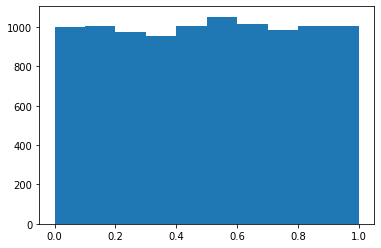

In [18]:
# uniform distrobution
numbers = []
for _ in range(10000):
    numbers.append(random.random())
    
from matplotlib import pyplot as plt
plt.hist(numbers)
plt.show()

Other modules provide random number generators. Below an example with `numpy.random` which allows among others to throw random numbers according to a standard normal distribution ($\mathcal{N}(0, 1)$).

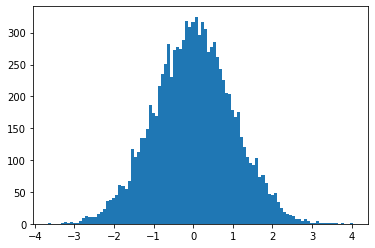

In [19]:
# normal distribution
from numpy.random import normal, seed

seed(1)
numbers = []
for _ in range(10000):
    numbers.append(normal())
    
plt.hist(numbers, 100)
plt.show()


#### Example of Monte Carlo Simulation

Let's check the probability to get two kings drawing randomly two cards from a deck.
Using a frequentist approach, we can calculate the probability of an event as the ratio of the number of favorable outcomes of an experiment (number of successes) and the number of all possible outcomes so for our example:

$$P_\textrm{two kings} = \frac{4}{40} \cdot \frac{3}{39} = \frac{1}{130} \approx 0.0077$$

Let's now try with a Monte Carlo simulation.

In [2]:
# define the domain of inputs
from random import sample, seed

deck = ['A', 'K', 'J', 'Q', '7', '6', '5', '4', '3', '2'] * 4

seed(1)
def deck_sim(trials):
    successes = 0.0
    for _ in range(trials):
        cards = sample(deck, 2)
        if cards == ['K', 'K']:
            successes += 1
    return successes

trials = 10000
successes = deck_sim(trials)
print (successes/trials)

0.007


Since we rely on a frequentist approach naively we can say that the lower is the probability we need to estimate the higher has to be the number of simulated trials. This is because to get a reasonable number of "success" so that the uncertainty in the probability is small, we have to try many times. This is apparent playing with the number of trials in the above simulation.
Monte Carlo Simulation is not always the best approach to follow !

In [5]:
trials = 100
successes = deck_sim(trials)
print (successes/trials)

trials = 1000000
successes = deck_sim(trials)
print (successes/trials)

0.02
0.007836


### Determine $\pi$

Also in this case we know what to expect: $\pi\approx 3.141592653589793\ldots$. In order to get an estimate with MC simulation a straightforward geometric approach is to consider a circle of diameter $D$ which is inscribed in a square with side length $D$. 

<img src="circle_inscribed.jpeg" width=200>

Computing the ratio of the area of the 2 figures

$$\cfrac{\textrm{Area Circle}}{\textrm{Area Square}} = \cfrac{\pi D^2/4}{D^2} = \cfrac{\pi}{4} $$

The algorithm to approximate $\pi$ should be like the following:
* select 2 random numbers, $x_1$ and $x_2$, from the interval $[0,D]$;
* determine if the point defined by the ordered pair $(x_1, x_2)$ lies within or on
the circle (check if $\sqrt{x_1^2 + x_2^2} \le D$) , keeping track of the total number of points within or on the circle and the total number of points tested;
* approximate the ratio of the areas by the number of points within or on the
circle divided by the total number of points tested;
* multiply the approximated area by 4 to get $\pi$.

In [21]:
from random import random, seed
from math import sqrt

seed(1)
trials=1000000
in_circle = 0
for _ in range(trials):
    # assume D=1
    # set the origin in the center of the circle
    # generate x between -D/2 and +D/2
    x1 = random()-0.5
    x2 = random()-0.5
    r = sqrt(pow(x1, 2)+pow(x2, 2))
    # check if the distance of P(x1, x2) to the origin is <= circle radius
    if r <= 0.5:
        in_circle += 1
        
print (in_circle/trials*4)

3.140696


### Accuracy of Monte Carlo Simulations

The central limit theorem states that if we have $Y_1, Y_2,\dots, Y_n$ which are random samples from a distribution $Y$ with true mean $\mu$ and variance $\sigma^{2}$, then when $n$ is sufficiently large, 

$$ \mu_n = \cfrac{1}{n}\sum_i^n Y_i $$
has approximately a normal distribution $\mathcal{N}(\mu, \sigma^2/n)$. 

**This means that if ones repeates a MC experiment (e.g. changing the seed of the random number generator) she should obtain results normally distributed around the *true* value $\mu$.**

In [7]:
# define the domain of inputs
import numpy as np
from random import sample, seed

deck = ['A', 'K',  'Q', 'J', '2', '3', '4', '5', '6', '7'] * 4
experiments = 1000
trials = 10000
r = []
for e in range(experiments):
    seed(e)
    successes = 0.0
    for i in range(trials):
        cards = sample(deck, 2)
        if cards == ['K', 'K']:
            successes += 1
        
    r.append(successes/trials)

print ("Mean: ", np.mean(r))
print ("Std : ", np.std(r))

Mean:  0.0076885
Std :  0.0008707799664668452


![](experiment_distribution.png)

Hence:
$$\mu_n - \mu \approx \mathcal{N}(0, \sigma^2/n) $$

So considering one single Monte Carlo experiment we can define an interval so that there is a certain probability to find $\mu$ in there.
Referring to the previous Figure we can write:

$$ \mathbb{P}\left(\mu_n - \cfrac{1.96\sigma}{\sqrt{n}}\le \mu \le \mu_n + \cfrac{1.96\sigma}{\sqrt{n}}\right) = 0.95$$

<img src="confidence_interval.png">

This interval is called **95% confidence interval** because the shaded part covers 95% of the total area under the Gaussian.
It can be interpreted as if you repeat many times the above simulation, the fraction of calculated confidence intervals that contains the true parameter $\mu$ would tend toward 95%.

The most common intervals are 99% and 95% confidence levels and are respectively defined as $\pm \cfrac{2.57\sigma}{\sqrt{n}}$ and $\pm \cfrac{1.96\sigma}{\sqrt{n}}$ (in the notes there is the formula to define custom intervals).

The confidence interval can be used to assess the accuracy of the Monte Carlo simulation.
The root mean squared error on our best estimate of $\mu$ is:

$$ \mathrm{RMSE}(\mu_n) = \sqrt{\mathbb{E}((\mu_n - \mu )^2)} = \sqrt{\cfrac{\sigma^2}{n}}=\cfrac{\sigma}{\sqrt{n}} $$
where $\sigma^2 = \mathrm{Var}(Y)$.

* to get one more decimal digit of accuracy is like asking for an RMSE
one tenth as large, and that requires a 100-fold increase in computation. 
* to get three more digits of accuracy requires one million times as much computation. 

#### Advantages
* Strong way of estimating uncertainty;
* simple & intuitive, this approach is quite easy to understand.

#### Disadvantages
* Computationally inefficient — when you have a large amount of variables bounded to different constraints, it requires a lot of time and a lot of computations to approximate a solution using this method;
* if poor parameters and constraints are input into the model then poor results will be given as outputs.

## Stochastic Processes

If a system evolves according to a *deterministic* process, all data necessary to predict its development with 100% certainty is available.

Real life processes usually are noisy, in the sense that they are distorted and exhibits behaviours that cannot be described by a deterministic model. It is then necessary to switch to stochastic processes in order to model the
uncertainty (i.e. patterns not described by a deterministic model) of our data.

A *stochastic or random process*, mahtematically, can be defined as a collection of random variables that is indexed by some set (usually time), meaning that each random variable of the stochastic process is uniquely associated with an element in the set (e.g. a time). 

![](random_process.png)

A model of the dynamics of asset prices must reflect the random nature of price movements and indeed stock prices are usually assumed to follow a so called *Markov process*. Markov processes can be characterized as a particular type of stochastic processes without any history. Past values and the way the present has emerged from the past are therefore irrelevant. This unique characteristic of Markov processes render them memoryless.

The simplest example of Markov stochastic process is the so called Wiener process ($W$) or elementary Brownian motion, which is characterized by stationary and independent increments that are normally distributed. Those increments can be expressed as

$$dW = Z \sqrt{dt}$$
where $Z ∼ \mathcal{N}( 0, 1 )$ and $\mathcal{N}$ represents the standard normal Gaussian. The mean of $dW$ is
zero and its variance is $dt$, which means the standard deviation grows with the square root of time. It follows that $W(t) ∼ \mathcal{N}( 0, t )$ because each $dW$ is distributed like independent standard Gaussian. 

!()[wiener_process.png]

An It$\hat{o}$ process ($X$) is a stochastic process whose increments satisfy the following *stochastic differential equation* (SDE)

$$dX ( t ) = \mu ( t, X ( t )) dt + \sigma ( t, X ( t )) dW ( t )$$ 

In the special case where the drift $\mu$ and the diffusion coefficient $\sigma$ are constant (i.e. deterministic and independent of both the time $t$ and the variable $X$), the process $X ( t )$ is called an arithmetic Brownian motion. The corresponding SDE is

$$dX ( t ) = \mu dt + \sigma dW (t) = \mu dt + \sigma \sqrt{t}\mathcal{N}(0,1)$$

thus $X(t) ∼ \mathcal{N} ( \mu t, \sigma^2 t )$.
Since an arithmetic Brownian motion can also take negative values, this type of process is unsuitable for simulating asset prices. These are rather assumed to follow a geometric Brownian motion (GBM) instead.

### Log-normal Stochastic Differential Equation

Stock prices deviate from a steady state as a result of the random fluctuations given by the trades. Considering a stock with a price $S_t$ and an expected rate of return $\mu$, then the relative change in its price during a period $dt$ can be decomposed in two parts:

* a deterministic part that is the expected return from the stock hold during the time period $dt$ ($\mu S_tdt$)
* a stochastic part which reflects the random changes of the market (e.g. as a response to external effects such as unexpected news). A reasonable assumption is to take this contribution proportional to the stock ($\sigma S_tdB_t$ where $dB_t$ is a random walk process equal to $\mathcal{N}(0,1)\sqrt{dt} = \epsilon\sqrt{dt}$).

The resulting differential equation is:

$$dS_t = \mu S_tdt + \sigma S_tdB_t$$
or
$$\frac{dS_t}{S_t} = d\textrm{log}(S_t) = \mu dt + \sigma dB_t$$

The solution of this equation can be derived by applying the It$\hat{o}$'s formula (you can find the full derivation in the notes).
$$S_t = S_{t-1}e^{\big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma\epsilon\sqrt{dt}}$$

As can be seen from the following equation:

$$d(\textrm{log} S_t) = \big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma\epsilon\sqrt{dt}$$

the change in $\textrm{log} S_t$ has a constant *drift* $\mu - \frac{1}{2}\sigma^2$ and a constance variance rate $\sigma^2$ (remember that $\epsilon$ is a normally distributed random variable ($\mathcal{N}(0,1)$). So you have a constant plus a gaussian distributed variable, therefore $\textrm{log} S_t$ at some time $T$ is normally distributed with:

$$\textrm{log}S_t - \textrm{log}S_0 \approx\mathcal{N}\big[\big(\mu-\frac{\sigma^2}{2}\big)T, \sigma^2 T\big]$$

This equation shows that $\textrm{log}S_t$ is normally distributed, but **a variable whose logarithm is normally distributed is said to be log-normal**. Hence the model we have just developed implies that the stock price at time T, given today's price, is lognormally distributed.

Lognormality is important because we need to ensure that a stock price will never be negative. Indeed looking at the initial $dS$ equation we have that:

$$dS_t = \mu S_tdt + \sigma S_tdB_t$$

which shows that the closer is $S_t$ to 0 the smaller is the $dS$ variation (so it will never go below 0).

## Simulating Stochastic Differential Equations

If we need to simulate SDEs in order to estimate quantities of interest the most fundamental method is the Euler scheme (the Milstein scheme, an extention of Euler scheme, is discussed in the notes).

As a starting point consider an SDE of the form

$$dX ( t ) = \mu ( t, X ( t )) dt + \sigma ( t, X ( t )) dW ( t )$$

note that both the drift $\mu$ and the diffusion \$\sigma$ are functions of the process variable $X$ and the time $t$. 

The simulation of values of $X ( T )$, it is generally done by simulating a discretized process, $\{ X_b , X_{2b} , \ldots , X_{mb} \} = \{ X ( t_i ) , X ( t_i + 1 ) , \ldots, X ( t_i + n )\}$ ,
where the time steps $\Delta t$ are constant and denoted by $b$. Furthermore, the variable $m$ indicates the total number of simulated time steps, with $mb = T$.

Taking these preliminary considerations into account, the Euler scheme is given by

$$X ( t_i + 1 ) = X ( t_i ) + \mu ( t_i , X ( t_i )) b + \sigma ( t_i , X ( t_i )) \sqrt{b} Z_{i + 1}$$

where $Z_i$ are independent standard normal random vectors, $Z_i ∼ \mathcal{N} ( 0, 1 )$ .

The last equation for example allows to simulate an arbitrary number of possible asset price *paths* by Monte
Carlo. Particularly, a random path for an asset price can be simulated by sampling repeatedly for $Z$ from $\mathcal{N} ( 0, 1 )$ and substituting it in the equation.

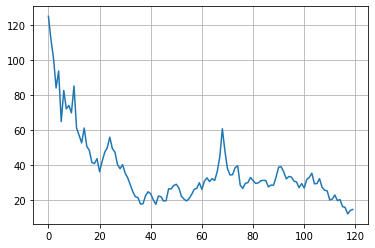

In [25]:
# stock price evolution
from numpy.random import normal, seed
from math import exp, sqrt

seed(1)
S = 100
mu = -0.01
sigma = 0.15
dT = 1
histo = []
for _ in range(120):
    S = S*exp((mu-0.5*sigma**2*dT)+sigma*sqrt(dT)*normal())
    histo.append(S)

plt.plot(range(120), histo)
plt.grid(True)
plt.show()

## Markov Chain

A Markov chain is a mathematical system usually defined as a collection of random variables,
that transition from one state to another according to certain probabilistic rules. These set of
transition satisfies the Markov property, which states that the probability of transitioning to
any particular state is dependent solely on the current state and time elapsed, and not on the
sequence of state that preceded it.

### Discrete Time Markov Chain
A discrete-time Markov chain involves a system which is in a certain state at each step, with
the state changing randomly between steps. The steps are often thought of as moments in
time. A discrete time Markov chain is a sequence of random variables $X_1 , X_2 , X_3 ,\ldots$ with the Markov
property, such that the probability of moving to the next state depends only on the present
state and not on the previous states. Putting this is mathematical probabilistic formula:

$$P ( X_{n + 1} ) = x | X_1 = x_1 , X_2 = x_2 , \ldots , X_n = x_n ) = P ( X_{n + 1} = x | X_n = x_n )$$

The probability of $X_{n + 1}$ only depends on the probability of $X_n$ that precedes it. Which means the knowledge of the previous state is all that is necessary to determine the probability distribution of the current state, satisfying the rule of conditional independence.

### The Markov Model
A Markov chain can be represented by a set of probabilities associated with the various possible transitions (the changes of state of the system). These probabilities are usually put in matricial form creating the *transition matrix*. Each element of the matrix can be read as the probability of going to state $X_{n + 1}$ given the current value of state $X_n$. 

If the Markov chain has $N$ possible states, the matrix will be an $N\times N$ matrix, such that entry $( i, j )$ is the probability of transitioning from state $i$ to state $j$. 
So, the model is characterized by a state space (the set of possible state of the system), a transition matrix escribing the probabilities of particular transitions, and an initial state across the state space. 

#### Markov Chain to Predict Market Trends
Markov chains can be used to model the probabilities of certain financial market climates and thus predicting the likelihood of future market conditions. These conditions, also known as trends, are:
* *bull markets*: periods of time where prices generally are rising, due to the actors having optimistic hopes of the future;
* *bear markets*: periods of time where prices generally are declining, due to the actors having a pessimistic view of the future;
* *stagnant markets*: periods of time where the market is characterized by neither a decline nor rise in general prices.

The transition matrix of such trends can be inferred from the analysis of historical data. Given the following transition probabilities

![](markov_chain.png)

It is easy now to derive the transition matrix 

$$\Pi = 
\begin{bmatrix}
p_{11} & p_{12} & p_{13} \\
p_{12} & p_{22} & p_{23} \\
p_{13} & p_{32} & p_{33}
\end{bmatrix} =
\begin{bmatrix}
0.9 & 0.075 & 0.025 \\
0.15 & 0.8 & 0.05 \\
0.25 & 0.25 & 0.5
\end{bmatrix} 
$$

Let’s indicate with a $1 \times 3$ vector $C$ the information about which of the three different states the market is in; where column 1 represents a bull week, column 2 a bear week and column 3 a stagnant week. Assume that today’s week the market is in a bearish state, resulting in the initial vector $C_0 = ( 0, 1, 0 )$.

To calculate the probabilities of a bull, bear or stagnant week for any number of $n$ weeks into the future it is enough to multiply $C$ by the transition matrix $n$ times $(C_n = C_0 \cdot \Pi^n )$.

$$C_1 = C_0 \cdot \Pi =  
\begin{bmatrix}
0 \\
1 \\
0 
\end{bmatrix}
\begin{bmatrix}
0.9 & 0.075 & 0.025 \\
0.15 & 0.8 & 0.05 \\
0.25 & 0.25 & 0.5
\end{bmatrix} = 
\begin{bmatrix}
0.15 \\
0.8 \\
0.05 
\end{bmatrix}
$$

With python it is possible to determine longer term behaviour quite easily.

In [21]:
import numpy as np

n = 50
C = np.array([0, 1, 0])
P = np.array([[0.9, 0.075, 0.025],[0.15, 0.8, 0.05],[0.25, 0.25, 0.5]])

for i in range(n):
    C = C.dot(P)
print (C)

[0.62499979 0.31250019 0.06250002]


From this example it can be concluded that as $n\rightarrow\infty$, the probabilities will converge to
a steady state, meaning that 63% of all weeks will be bullish, 31% bearish and 6% stagnant.

![](markov_chain_sim.png)

It can also be shown, by changing C 0 that the steady-state probabilities of this Markov chain do not depend upon the initial state.
The results can be used in various ways, some examples are calculating the average time it takes for a bearish period to end, or the risk that a bullish market turns bearish or stagnant.

## Interest Rate Derivatives

### Interest Rate Swaps

Interest rate swaps (IRS) consist of a floating leg and a fixed leg. The contract parameters are:

* start date $d_0$
* notional $N$
* fixed rate $K$
* floating rate tenor (months)
* maturity (years)

The floating leg pays the reference LIBOR fixing at a frequency equal to the tenor of the floating rate - so for example an IRS on a 3-month LIBOR will pay a floating coupon every three months, an IRS on 6-month EURIBOR pays the floating coupon every six months and so on.

The fixed leg pays a predetermined cash flow at annual frequency, regardless of the tenor of  the underlying floating rate. (for simplicity we will only consider swaps with maturities which are multiples of 1 year).

Before going into the deatils of the valuation of IRSs, we need to modify the `generate_dates` function in `finmarkets` module to generate the payment dates for both the fixed and floating legs, as follows:

In [26]:
# modify generate_dates
from datetime import date
from dateutil.relativedelta import relativedelta

def generate_dates(start_date, nmonths, tenor=12):
    dates = []
    for i in range(0, nmonths, tenor):
        dates.append(start_date + relativedelta(months=i))
    dates.append(start_date + relativedelta(months=nmonths))
    return dates

generate_swap_dates(date.today(), 15, 4)

[datetime.date(2020, 10, 28),
 datetime.date(2021, 2, 28),
 datetime.date(2021, 6, 28),
 datetime.date(2021, 10, 28),
 datetime.date(2022, 1, 28)]

Using this function and the contract parameters we will be able to  determine a sequence of payment dates for each of the two legs.

Let $d_0=d_0^{\mathrm{fixed}},...,d_p^{\mathrm{fixed}}$ be the fixed leg payment dates and $d_0=d_0^{\mathrm{float}},...,d_p^{\mathrm{float}}$ be the floating leg payment dates, and let's use the following notation:

* $d$ the pricing date
* $D(d, d')$ the discount factor observed in date $d$ for the value date $d'$
* $F(d, d', d'')$ the forward rate observed in date $d$ for the period $[d', d'']$. The rate tenor is $\tau = d'' - d'$.

The NPV of the fixed leg is calculated as follows:

$$\mathrm{NPV}_{\mathrm{fixed}}(d; K) = N\cdot K\cdot\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}})$$

while the NPV of the floating leg is calculated as follows:

$$\mathrm{NPV}_{\mathrm{float}}(d) = N\cdot\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360}
\cdot D(d, d_{i}^{\mathrm{float}})$$

Therefore the NPV of the swap (seen from the point of view of the counter-party which receives the floating leg) is

$$\mathrm{NPV}(d; K) = \mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d;K)$$

For reasons which will become apparent later, it's actually more convenient to express the NPV of an IRS as a function of the fair value fixed rate $S$ of the IRS, also known as the **swap rate**. $S$ is the value of $K$ which makes $\mathrm{NPV}(d)=0$.

On the basis of the previous expressions, we can easiy calculate $S$ as:

$$\mathrm{NPV}_{\mathrm{fixed}}(d;S) = \mathrm{NPV}_{\mathrm{float}}(d)$$
<br>
$$N\cdot S\cdot\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}}) = N\cdot\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360} \cdot D(d, d_{i}^{\mathrm{float}})$$
<br>
$$S=\frac{\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360}
\cdot D(d, d_{i}^{\mathrm{float}})}{\sum_{i=1}^{n}D(d, d_i^{\mathrm{fixed}})} $$

Once we have calculated $S$, we can express the $\mathrm{NPV}$ of an IRS as follows:

$$\begin{align}&\mathrm{NPV}(d; K) = \mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d; K) = & \\ \\ &= \underbrace{\mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d; S)}_{\mathrm{=\;0}} + \mathrm{NPV}_{\mathrm{fixed}}(d;S) - \mathrm{NPV}_{\mathrm{fixed}}(d;K) & \\ & = N\cdot(S-K)\cdot\underbrace{\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}})}_{\mathrm{'annuity'}}\end{align}$$

Now we can implement an `InterestRateSwap` class to valuate IRS contracts.

In [3]:
# implement InterestRateSwap 
class InterestRateSwap:
    def __init__(self, obs_date, start_date, nominal, fixed_rate, tenor_months, maturity_years):
        self.nominal = nominal
        self.obs_date = obs_date
        self.fixed_rate = fixed_rate
        self.fixed_leg_dates = generate_dates(start_date, 12 * maturity_years, 
                                                   tenor_months)
        self.floating_leg_dates = generate_dates(start_date, 12 * maturity_years,
                                                      tenor_months)
                
    def annuity(self, discount_curve, start_date=None):
        a = 0
        for i in range(1, len(self.fixed_leg_dates)):
            if start_date is None or start_date < self.fixed_leg_dates[i]:
                a += discount_curve.df(self.fixed_leg_dates[i])
        return a

    def num(self, discount_curve, libor_curve):
        s = 0
        for j in range(1, len(self.floating_leg_dates)):
            F = libor_curve.forward_rate(self.floating_leg_dates[j], self.floating_leg_dates[j-1])
            tau = (self.floating_leg_dates[j] - self.floating_leg_dates[j-1]).days / 360
            D = discount_curve.df(self.floating_leg_dates[j])
            s += F * tau * D
        return s
    
    def swap_rate(self, discount_curve, libor_curve):
        return self.num(discount_curve, libor_curve) / self.annuity(discount_curve)
        
    def npv(self, discount_curve, libor_curve):
        S = self.swap_rate(discount_curve, libor_curve)
        A = self.annuity(discount_curve)
        return self.nominal * (S - self.fixed_rate) * A

For convenience the relevant inputs that will be used later (libor and discount curve definitions) have been saved in the files $\href{https://drive.google.com/file/d/1dm5oZnZKmJM6UrV0L32OcqD5Tzs9SI9A/view?usp=sharing}{\texttt{libor_curve.xlsx}}$ and $\href{https://drive.google.com/file/d/14R22r7m-6VpQ_P79D3qHdK0QN_mOQ_UB/view?usp=sharing}{\texttt{discount_curve.xlsx}}$.

In [9]:
# import xlsx and define discount and libor curves
import pandas as pd
from datetime import date
from finmarkets import DiscountCurve, ForwardRateCurve, generate_dates

observation_date = date.today()
discount_data = pd.read_excel('discount_curve.xlsx')
libor_data = pd.read_excel('libor_curve.xlsx')

dc = DiscountCurve(observation_date, 
                   discount_data['pillars'].dt.date.tolist(),
                   discount_data['discount_factors'].tolist())

fr = ForwardRateCurve(observation_date, 
                      libor_data['dates'].dt.date.tolist(),
                      libor_data['rates'].tolist())

print(dc.df(date(2021, 1, 1)))

1.0041959227522805


Let's test our class instantiating an IRS with 1M notional, fixed rate of 5%, 6 month tenor and a maturity of 4 years; discount and libor curves are the same as before.

In [10]:
# test it
from dateutil.relativedelta import relativedelta

start_date = date.today() + relativedelta(months=1)
irs = InterestRateSwap(date.today(), start_date, 1.e6, 0.05, 6, 4)
irs.npv(dc, fr)

-155215.90894583438

Can you guess what could be the **swap rate** given the value obtained for the NPV ? (In particular will it be higher or lower than the IRS fixed rate of 5% ?)

(Remember that we are looking at this contracts from the point of view of the receiver of the floating leg...)

In [11]:
# check the swap rate
irs.swap_rate(dc, fr)

0.03073666118338544

To check if the we have computed correctly the swap rate we can instanciate a new IRS with fixed rate equal to the just calculated swap rate and print its NPV, it should come very close to 0.

In [14]:
# check NPV of new IRS
irs_new = InterestRateSwap(date.today(), start_date, 1e6, 0.03074, 6, 4)
irs_new.npv(dc, fr)

-26.902784640079684

## Inheritance

At this point we have implemented two swap classes and we can try an alternative approach, inheritance. 
This is just for illuatration since, as we will see, there is not much code to share between $\tt{InterestRateSwap}$ and $\tt{OvernightIndexSwap}$.

In [ ]:
# inheritance
class GenericSwap:
    def __init__(self, notional, start_date, fixed_rate,
                maturity, tenor=12):
        self.notional = notional
        self.start_date = start_date
        self.fixed_rate = fixed_rate
        self.fixed_payment_dates = generate_dates(start_date, maturity*12)
        self.floating_payment_dates = generate_dates(start_date, maturity*12,
                                                     tenor)
    
def InterestRateSwap(GenericSwap):
    def annuity():
    def swap_rate():
        
def OvernightIndexSwap(GenericSwap):
    def npv_floating_leg()
    def npv_fixed_leg()

## Interest Rate Swaptions

Swaptions are the equivalent of European options for the interest rate markets. They give the option holder the right but not the obligation, at the exercise date $d_{ex}$, to enter into an Interest Rate Swap at a pre-determined fixed rate.

Clearly the option holder will only choose to do this if the NPV of the underlying swap at $d_{ex}$ is positive - looking at the expression for the NPV of the IRS in terms of the swap rate $S$ therefore, we can see that the payoff of the swaption is

$$N\cdot \mathrm{max}(0, S(d_{\mathrm{ex}}) - K)\cdot\sum D(d, d_i^{\mathrm{fixed}})$$

The key issue is now to estimate $S(d_{\mathrm{ex}})$ in order to evaluate the payoff of a swaption. This will be shown with two alternative approaches.

#### Evaluation through Black-Scholes formula

In this case, to evaluate the NPV of this payoff, we'll use a generalization of the Black-Scholes-Merton formula applied to swaptions:

$$\mathrm{NPV} = N\cdot A\cdot [S \Phi(d_+) - K\Phi(d_-)]$$

where $\Phi$ represents the cumulative distribution function of the normal distribution

$$d_{\pm} = \frac{\mathrm{log}(\frac{S}{K}) \pm \frac{1}{2}\sigma^{2}T}{\sigma\sqrt{T}}\qquad(\sigma~\textrm{is the volatility of the swap rate})\\$$
$$A =\sum_{i=1}^{p}D(d, d_{i}^{\mathrm{fixed}})\qquad\mathrm{(annuity})$$


As an example let's consider a swaption whose underlying 6M-IRS has a notional of 1M, fixed rate of 1%, and a maturity of 4 years.
In addition we assume a volatility associated to the swap rate of about 7%.

In [17]:
# define function to compute swaption payoff
from math import log, sqrt
from scipy.stats import norm 

def swaptionPayoffBS(irs, dc, fr, sigma, T):
    N = irs.nominal
    K = irs.fixed_rate
    S = irs.swap_rate(dc, fr)
    A = irs.annuity(dc)
    dp = (log(S/K) + 0.5*sigma**2*T)/(sigma*sqrt(T))
    dm = (log(S/K) - 0.5*sigma**2*T)/(sigma*sqrt(T))
    return N*A*(S*norm.cdf(dp)-K*norm.cdf(dm))

observation_date = date.today()
star_date = observation_date + relativedelta(months=1)
irs = InterestRateSwap(observation_date, start_date, 1e6, 0.01, 6, 4)
exercise_date = start_date
T = (exercise_date - observation_date).days/365
sigma = 0.07
swaptionPayoffBS(irs, dc, fr, sigma, T)

167087.3229569575

#### Evaluation through Monte-Carlo Simulation

In this second case we start from the current swap rate $S(d)$ evaluated at the pricing date $d$, and assume that it follows a log-normal stochastic process, i.e. its distribution at $d_{\mathrm{ex}}$ (exercise date) is $S(d_{\mathrm{ex}}) = S(d)\mathrm{exp}(-\frac{1}{2}\sigma^{2}T+\sigma\sqrt{T}\epsilon)$ where $\epsilon\approx\mathcal{N}(0,1)$. 
Notice that it is assumed that the *drift* rate in the evolution of the swap rate is zero.
Given that the discounted payoff is given by:

$$N\cdot \mathrm{max}(0, S(d_{\mathrm{ex}}) - K)\cdot\sum D(d, d_i^{\mathrm{fixed}})$$

to perform the simulation we can:

* sample the normal distribution $\mathcal{N}(0, 1)$ to calculate a large number of scenarios for $S(d_{\mathrm{ex}})$;
* evaluate the underlying swap's NPV at the exercise date, and consequently the swaption's payoff, for each scenario;
* take the average of these values to get the final estimate.

In [19]:
# implement MC swaption payoff
import numpy as np
from math import exp, sqrt
from numpy.random import normal, seed

n_scenarios = 100000
payoffs = []
S0 = irs.swap_rate(dc, fr)
for _ in range(n_scenarios):
    S = S0 * exp(-0.5*sigma*sigma*T + sigma*sqrt(T)*normal())
    payoff = irs.nominal*max(0, S - irs.fixed_rate)*irs.annuity(dc)
    payoffs.append(payoff)

print (np.mean(payoffs))

167085.00972089425


### Confidence Interval
So let's calculate the 95% confidence level for the swaption simulation above.

In [20]:
# calculate the MC error estimate as
# 95% confidence interval
interval = 1.96*np.std(payoffs)/sqrt(n_scenarios)
print ("{} +- {}".format(np.mean(payoffs), interval))

167085.00972089425 +- 30.830050973212675
